<a href="https://colab.research.google.com/github/ChrisFJardine/Masterclass/blob/submission_version/CJardineAssignment3__NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import re
import time
import datetime
import os
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.chunk import conlltags2tree, tree2conlltags
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from wordcloud import WordCloud
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn
from pprint import pprint
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm


%matplotlib inline 
from datetime import datetime, timedelta

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
news = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment 3/ExtractedNews.csv', header = None)
docs = []
for x in range(news.shape[1]):
  for y in range(news.shape[0]):
    if isinstance(news[x][y], str):
      docs.append(news[x][y])
df = pd.DataFrame(docs)

In [ ]:

df['date'] = df[0].apply(lambda x: datetime.strptime(re.search(r'\d{4}-\d{2}-\d{2}', str(x)).group(),'%Y-%m-%d').date())
df['text'] = df[0].str.replace('[^\w\s]', '')
df['text'] = df['text'].str.replace('\d+','')
df['text'] = df['text'].str.lstrip()
#df['text'] = df['text'].str.lower()                                           #all to lower case
df = df.drop(df.columns[[0]], 1)
df.sort_values(by='date', inplace=True)


In [ ]:
def prep_data(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

In [ ]:
doc = df.iloc[4]['text']
words = prep_data(doc)


In [ ]:
pattern = 'NP: {<DT>?<JJ>*<NN>}'

In [ ]:
cp = nltk.RegexpParser(pattern)
cs = cp.parse(words)
print(cs)

In [ ]:
iob_tagged = tree2conlltags(cs)
pprint(iob_tagged)

In [ ]:
#Get Entities
ne_tree = nltk.ne_chunk(pos_tag(word_tokenize(doc)))
print(ne_tree)

In [ ]:
#Try Spacy
nlp = en_core_web_sm.load()
doc = nlp(df.iloc[10]['text'])
print(doc)
pprint([(X.text, X.label_) for X in doc.ents])

At the start of last year Adrian Zahra was preparing cars for his familys auto auction business in Melbourne
[('the start of last year', 'DATE'), ('Adrian', 'NORP'), ('Melbourne', 'GPE')]


In [ ]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

the start of last year 3 25 DATE
Adrian 26 32 NORP
Melbourne 99 108 GPE


In [ ]:
df2012.columns

Index(['date', 'text'], dtype='object')

In [ ]:
df2012 = df[( df['date'] > pd.Timestamp(2012,1,1))  &  (df['date'] < pd.Timestamp(2013,1,1)) ] 
listwords2012 = ' '.join([x for x in df2012.text]).split()


df2019 = df[( df['date'] > pd.Timestamp(2019,1,1))  &  (df['date'] < pd.Timestamp(2020,1,1)) ] 
listwords2019 = ' '.join([x for x in df2019.text]).split()
df2020 = df[( df['date'] > pd.Timestamp(2020,1,1))  &  (df['date'] < pd.Timestamp(2021,1,1)) ] 
listwords2020 = ' '.join([x for x in df2020.text]).split()

In [ ]:
ABC_staff = ['Michael Mccarthy','Kyle Rodda','Peter Newlinds','Marcus Padley','Laura Tingle','Kerry Lonergan','Leigh Sales','John Barron','Mark Humphries','Shannon Byrne','Grandstands Alister Nicholson', 'Richard Svenson','Zane Bojack','Lateline','Grandstands Dan Lonergan','Laurie Spina','Steve Mascord','Grandstands Craig Hamilton','Adam White']

In [ ]:
list2012_ents = []
print(type(list2012_ents))
for text in df2012['text']:
  ents = nlp(text)
  for ent in ents.ents:
    if ent.label_ == 'PERSON' and ent.text not in ABC_staff:
      list2012_ents.append(ent.text)
#print(ent.text, ent.start_char, ent.end_char, ent.label_)

<class 'list'>


In [ ]:
list2019_ents = []
print(type(list2019_ents))
for text in df2019['text']:
  ents = nlp(text)
  for ent in ents.ents:
    if ent.label_ == 'PERSON' and ent.text not in ABC_staff:
      list2019_ents.append(ent.text)
#print(ent.text, ent.start_char, ent.end_char, ent.label_)

<class 'list'>


In [ ]:
list2020_ents = []
print(type(list2020_ents))
for text in df2020['text']:
  ents = nlp(text)
  for ent in ents.ents:
    if ent.label_ == 'PERSON' and ent.text not in ABC_staff:
      list2020_ents.append(ent.text)
#print(ent.text, ent.start_char, ent.end_char, ent.label_)

<class 'list'>


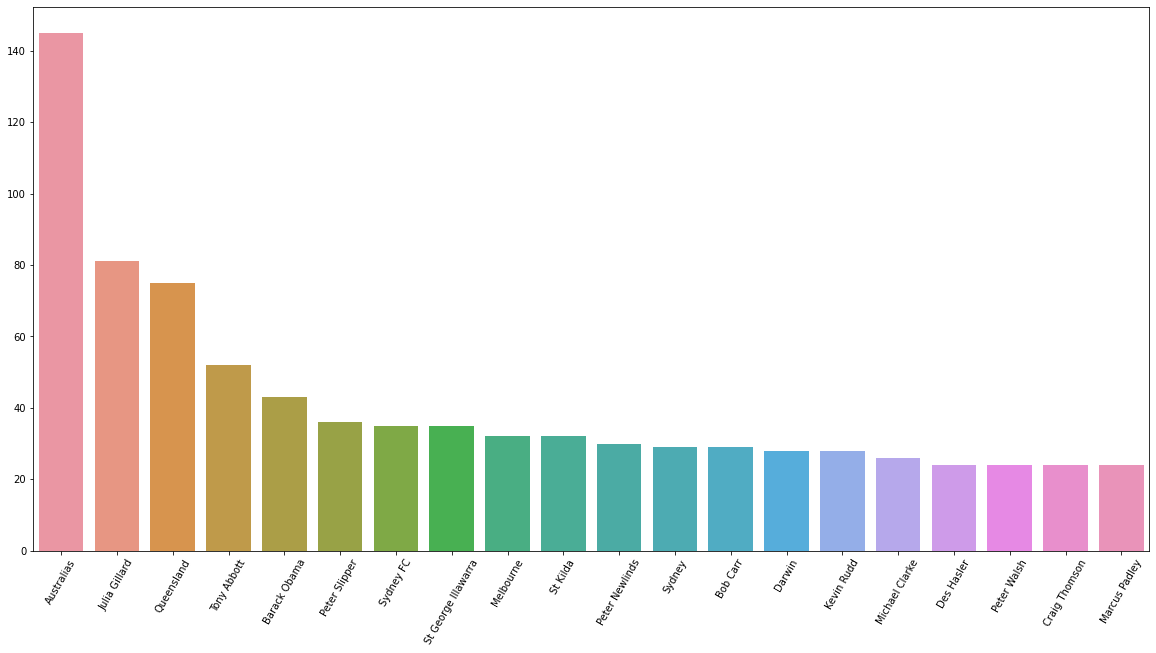

In [ ]:
fdist = FreqDist(list2012_ents)
#fdist.plot(30, cumulative = False, title = 'Top Entities of 2012' , figsize = (16,8))

fdist = FreqDist(list2012_ents).most_common(20)
all_fdist = pd.Series(dict(fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(20,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = seaborn.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=60);

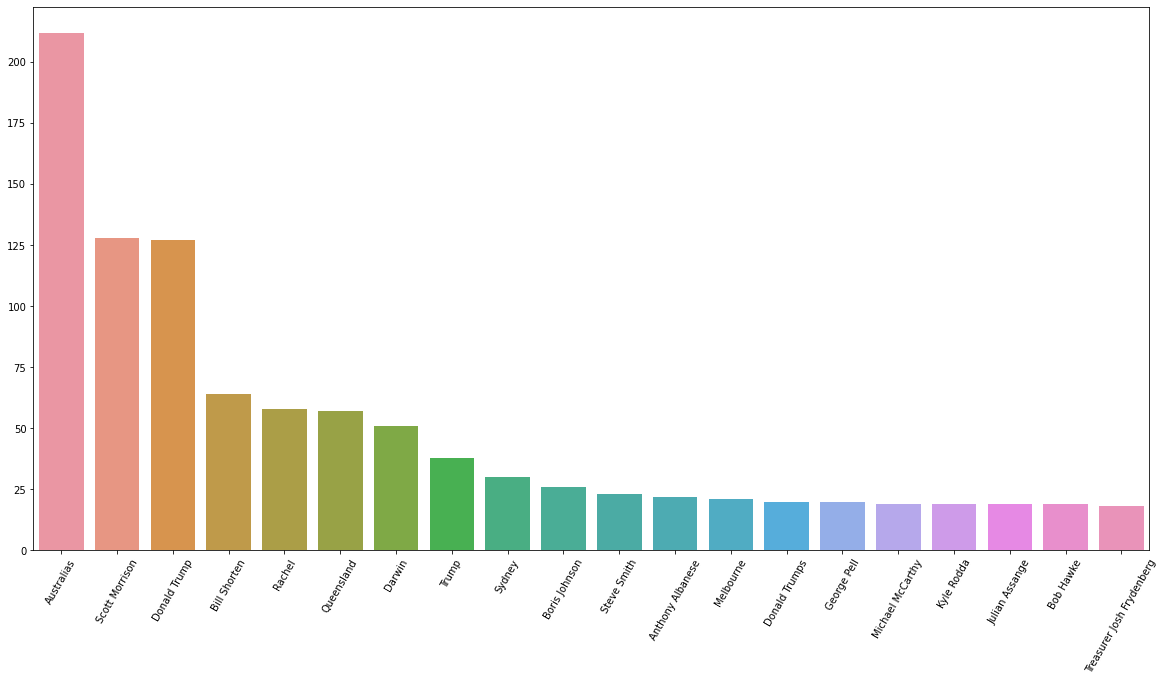

In [ ]:
fdist = FreqDist(list2019_ents)
#fdist.plot(30, cumulative = False, title = 'Top Entities of 2012' , figsize = (16,8))

fdist = FreqDist(list2019_ents).most_common(20)
all_fdist = pd.Series(dict(fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(20,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = seaborn.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=60);

In [ ]:
ABC_staff = ['Laura Tingle','Kerry Lonergan','Leigh Sales','John Barron','Mark Humphries','Shannon Byrne','Grandstands Alister Nicholson', 'Richard Svenson','Zane Bojack','Lateline','Grandstands Dan Lonergan','Laurie Spina','Steve Mascord','Grandstands Craig Hamilton','Adam White']

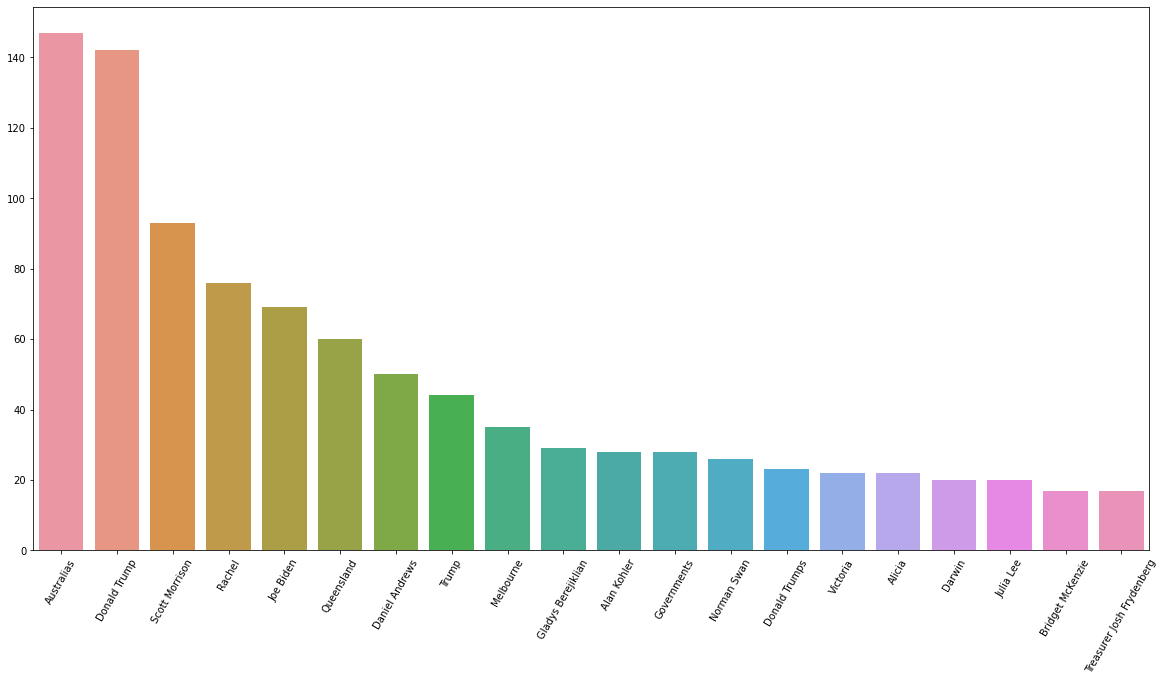

In [ ]:
fdist = FreqDist(list2020_ents)
#fdist.plot(30, cumulative = False, title = 'Top Entities of 2012' , figsize = (16,8))

fdist = FreqDist(list2020_ents).most_common(20)
all_fdist = pd.Series(dict(fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(20,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = seaborn.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=60);

In [ ]:
d = {}
for text in df2012['text']:
  words = nlp(text)
  for word in words.ents:
    # Check if the word is already in dictionary
    if word in d:
        print(word.str)
        # Increment count of word by 1
        d[word] = d[word] + 1
    else:
        # Add the word to dictionary with count 1
        d[word] = 1

In [ ]:
#dict(sorted(d.items(), key=lambda item: item[1], reverse = True))
d

{Brad Hodge: 1,
 Andrew McDonald: 1,
 Renegades: 1,
 Sixers: 1,
 The Federal Government: 1,
 Fijian: 1,
 Commodore Frank Bainimaramas: 1,
 Pacific: 1,
 British: 1,
 David Hockney: 1,
 Alviro Petersen: 1,
 South Africa: 1,
 Graeme Smith: 1,
 third: 1,
 Sri Lanka: 1,
 Newlands: 1,
 Tuesday: 1,
 Iran: 1,
 the Strait of Hormuz: 1,
 Monday: 1,
 West: 1,
 Tehrans: 1,
 Melbourne Renegades: 1,
 Andrew McDonald: 1,
 Grandstands Dan Lonergan: 1,
 Sydney Sixers: 1,
 the Big Bash League: 1,
 The Sydney Cricket Ground: 1,
 third: 1,
 Lords: 1,
 West Australian: 1,
 French: 1,
 Loren Rowney: 1,
 two: 1,
 the Bay Classic Criterium Series: 1,
 Melbourne Renegades: 1,
 Shane Harwood: 1,
 Grandstands Dan Lonergan: 1,
 Sydney Sixers: 1,
 the Big Bash League: 1,
 Sydney: 1,
 Victorias: 1,
 Sydney Sixers: 1,
 Steve Smith: 1,
 Grandstands Dan Lonergan Melbourne Renegades: 1,
 Australia: 1,
 Michael Clarke: 1,
 second: 1,
 India: 1,
 Jelena Dokic: 1,
 WTA: 1,
 Auckland: 1,
 Federal Government: 1,
 Perth: 1,


In [ ]:
displacy.render(nlp(str(df.head(20)[['text']])), jupyter=True, style='ent')